In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from umap import UMAP

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xd

In [2]:
df = pd.read_csv('REM_NREM.csv')

In [3]:
exclude = df['Sleep_Stage']

scaler = MinMaxScaler()
df_norm = df.drop(columns=['Sleep_Stage'])
df_norm = pd.DataFrame(scaler.fit_transform(df_norm), columns=df_norm.columns, index=df_norm.index)

df_norm['Sleep_Stage'] = exclude

In [8]:
df_unlabeled = df.drop('Sleep_Stage', axis = 1)
df_norm_unlabeled = df_norm.drop('Sleep_Stage', axis = 1)

Text(0, 0.5, 'Number of Observations')

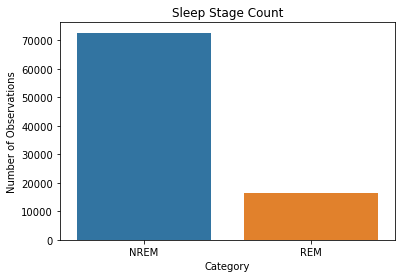

In [6]:
ss_valcounts = df.Sleep_Stage.value_counts()

sns.barplot(x=ss_valcounts.index, y=ss_valcounts.values)
plt.title('Sleep Stage Count')
plt.xlabel('Category')
plt.ylabel('Number of Observations')

In [33]:
um5 = UMAP(n_neighbors = 5, min_dist = 0.1)
ucs5 = um5.fit_transform(df_norm_unlabeled)

ucs5 = pd.DataFrame(ucs5)
ucs5_labeled = ucs5
ucs5_labeled['Sleep_Stage'] = exclude

<AxesSubplot:xlabel='0', ylabel='1'>

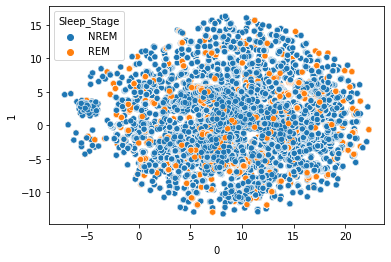

In [34]:
sns.scatterplot(x = ucs5_labeled.iloc[:, 0], y = ucs5_labeled.iloc[:, 1], hue = ucs5_labeled['Sleep_Stage'])

In [28]:
um50 = UMAP(n_neighbors = 50, min_dist = 0.1)
ucs50 = um50.fit_transform(df_norm_unlabeled)

ucs50 = pd.DataFrame(ucs50)
ucs50_labeled = ucs50
ucs50_labeled['Sleep_Stage'] = exclude

<AxesSubplot:xlabel='0', ylabel='1'>

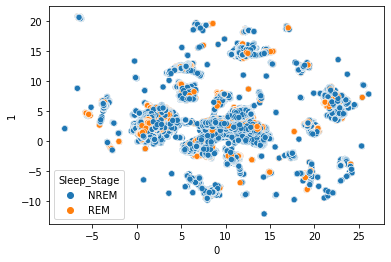

In [29]:
sns.scatterplot(x = ucs50_labeled.iloc[:, 0], y = ucs50_labeled.iloc[:, 1], hue = ucs50_labeled['Sleep_Stage'])

In [30]:
um100 = UMAP(n_neighbors = 100, min_dist = 0.1)
ucs100 = um50.fit_transform(df_norm_unlabeled)

ucs100 = pd.DataFrame(ucs100)
ucs100_labeled = ucs100
ucs100_labeled['Sleep_Stage'] = exclude

<AxesSubplot:xlabel='0', ylabel='1'>

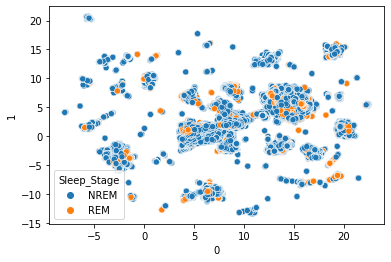

In [31]:
sns.scatterplot(x = ucs100_labeled.iloc[:, 0], y = ucs100_labeled.iloc[:, 1], hue = ucs100_labeled['Sleep_Stage'])

In [37]:
um_dist5 = UMAP(n_neighbors = 50, min_dist = 0.5)
ucs_dist5 = um_dist5.fit_transform(df_norm_unlabeled)

ucs_dist5 = pd.DataFrame(ucs_dist5)
ucs_dist5_labeled = ucs_dist5
ucs_dist5_labeled['Sleep_Stage'] = exclude

<AxesSubplot:xlabel='0', ylabel='1'>

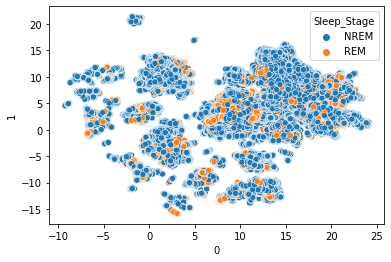

In [38]:
sns.scatterplot(x = ucs_dist5_labeled.iloc[:, 0], y = ucs_dist5_labeled.iloc[:, 1], hue = ucs_dist5_labeled['Sleep_Stage'])

In [39]:
um_dist9 = UMAP(n_neighbors = 50, min_dist = 0.9)
ucs_dist9 = um_dist9.fit_transform(df_norm_unlabeled)

ucs_dist9 = pd.DataFrame(ucs_dist9)
ucs_dist9_labeled = ucs_dist9
ucs_dist9_labeled['Sleep_Stage'] = exclude

<AxesSubplot:xlabel='0', ylabel='1'>

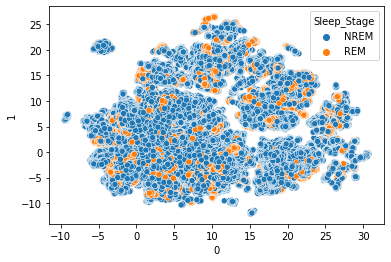

In [40]:
sns.scatterplot(x = ucs_dist9_labeled.iloc[:, 0], y = ucs_dist9_labeled.iloc[:, 1], hue = ucs_dist9_labeled['Sleep_Stage'])

In [44]:
um_100_dist9 = UMAP(n_neighbors = 100, min_dist = 0.9)
ucs_100_dist9 = um_100_dist9.fit_transform(df_norm_unlabeled)

ucs_100_dist9 = pd.DataFrame(ucs_100_dist9)
ucs_100_dist9_labeled = ucs_100_dist9
ucs_100_dist9_labeled['Sleep_Stage'] = exclude

<AxesSubplot:xlabel='0', ylabel='1'>

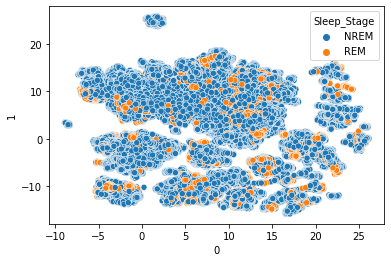

In [45]:
sns.scatterplot(x = ucs_100_dist9_labeled.iloc[:, 0], y = ucs_100_dist9_labeled.iloc[:, 1], hue = ucs_100_dist9_labeled['Sleep_Stage'])

In [49]:
um_5comp = UMAP(n_neighbors = 50, min_dist = 0.9, n_components = 5)
ucs_5comp = um_5comp.fit_transform(df_norm_unlabeled)

ucs_5comp = pd.DataFrame(ucs_5comp)
ucs_5comp_labeled = ucs_5comp
ucs_5comp_labeled['Sleep_Stage'] = exclude

<AxesSubplot:xlabel='0', ylabel='1'>

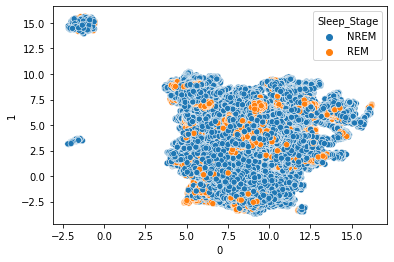

In [50]:
sns.scatterplot(x = ucs_5comp_labeled.iloc[:, 0], y = ucs_5comp_labeled.iloc[:, 1], hue = ucs_5comp_labeled['Sleep_Stage'])

In [59]:
ucs_5comp

,0,1,2,3,4,Sleep_Stage
0,7.312033,3.668991,1.477758,-0.520146,5.504270,NREM
1,7.439804,3.672459,1.370721,-0.743267,5.581409,NREM
2,7.458676,3.657312,1.955457,-0.452688,5.635823,NREM
3,8.336330,4.012373,1.945923,-1.070785,5.638573,NREM
4,9.074511,4.305408,2.437608,-1.785459,5.582511,NREM
...,...,...,...,...,...,...
89091,5.627513,0.353210,1.992756,1.787275,5.217186,NREM
89092,6.126190,0.819932,2.823487,1.912768,5.079236,NREM
89093,7.416808,-0.660286,1.468874,4.763151,3.911354,NREM
89094,7.353299,-0.565926,2.720998,4.304904,3.621120,NREM


In [57]:
gmm2 = GaussianMixture(n_components = 2)
gmm4 = GaussianMixture(n_components = 4)

In [60]:
ucs_5comp_labeled['preds2'] = gmm2.fit_predict(ucs_5comp.drop('Sleep_Stage', axis = 1))
ucs_5comp_labeled['preds4'] = gmm4.fit_predict(ucs_5comp.drop(['Sleep_Stage', 'preds2'], axis = 1))

<AxesSubplot:xlabel='Sleep_Stage', ylabel='count'>

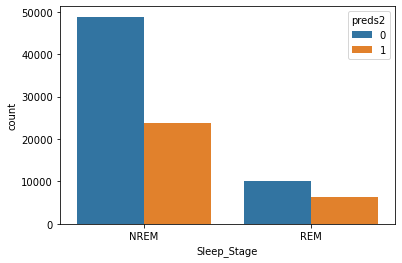

In [74]:
sns.countplot(data = ucs_5comp_labeled, x = 'Sleep_Stage', hue = 'preds2')

<AxesSubplot:xlabel='Sleep_Stage', ylabel='count'>

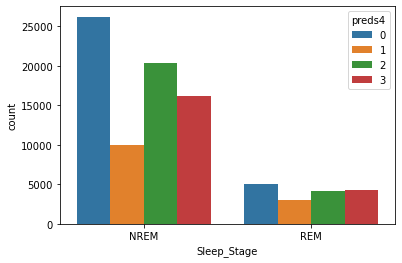

In [75]:
sns.countplot(data = ucs_5comp_labeled, x = 'Sleep_Stage', hue = 'preds4')

In [53]:
um_10comp = UMAP(n_neighbors = 50, min_dist = 0.9, n_components = 10)
ucs_10comp = um_10comp.fit_transform(df_norm_unlabeled)

ucs_10comp = pd.DataFrame(ucs_10comp)
ucs_10comp_labeled = ucs_10comp
ucs_10comp_labeled['Sleep_Stage'] = exclude

<AxesSubplot:xlabel='0', ylabel='1'>

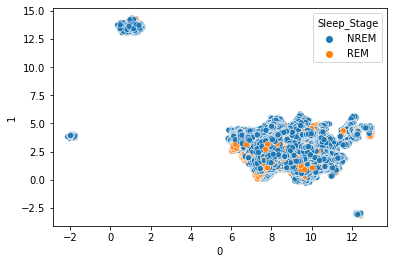

In [54]:
sns.scatterplot(x = ucs_10comp_labeled.iloc[:, 0], y = ucs_10comp_labeled.iloc[:, 1], hue = ucs_10comp_labeled['Sleep_Stage'])

In [76]:
ucs_10comp_labeled['preds2'] = gmm2.fit_predict(ucs_10comp.drop('Sleep_Stage', axis = 1))
ucs_10comp_labeled['preds4'] = gmm4.fit_predict(ucs_10comp.drop(['Sleep_Stage', 'preds2'], axis = 1))

<AxesSubplot:xlabel='Sleep_Stage', ylabel='count'>

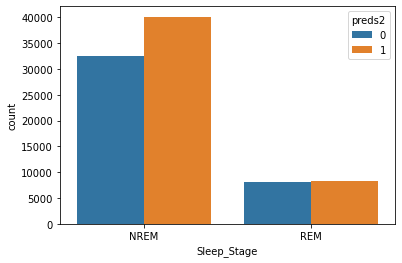

In [78]:
sns.countplot(data = ucs_10comp_labeled, x = 'Sleep_Stage', hue = 'preds2')

<AxesSubplot:xlabel='Sleep_Stage', ylabel='count'>

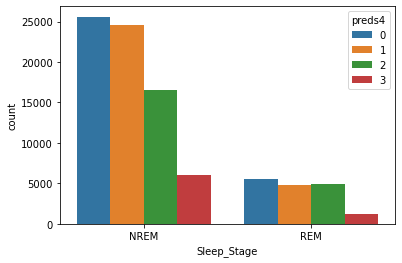

In [79]:
sns.countplot(data = ucs_10comp_labeled, x = 'Sleep_Stage', hue = 'preds4')

In [55]:
um_25comp = UMAP(n_neighbors = 50, min_dist = 0.9, n_components = 25)
ucs_25comp = um_25comp.fit_transform(df_norm_unlabeled)

ucs_25comp = pd.DataFrame(ucs_25comp)
ucs_25comp_labeled = ucs_25comp
ucs_25comp_labeled['Sleep_Stage'] = exclude

<AxesSubplot:xlabel='0', ylabel='1'>

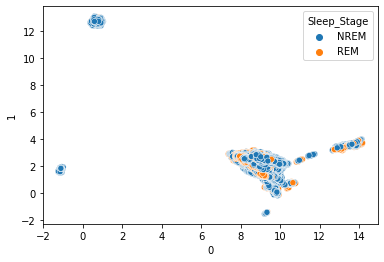

In [56]:
sns.scatterplot(x = ucs_25comp_labeled.iloc[:, 0], y = ucs_25comp_labeled.iloc[:, 1], hue = ucs_25comp_labeled['Sleep_Stage'])

In [80]:
ucs_25comp_labeled['preds2'] = gmm2.fit_predict(ucs_25comp.drop('Sleep_Stage', axis = 1))
ucs_25comp_labeled['preds4'] = gmm4.fit_predict(ucs_25comp.drop(['Sleep_Stage', 'preds2'], axis = 1))

<AxesSubplot:xlabel='Sleep_Stage', ylabel='count'>

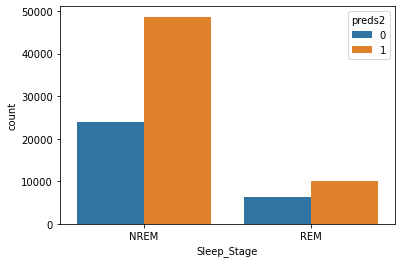

In [81]:
sns.countplot(data = ucs_25comp_labeled, x = 'Sleep_Stage', hue = 'preds2')

<AxesSubplot:xlabel='Sleep_Stage', ylabel='count'>

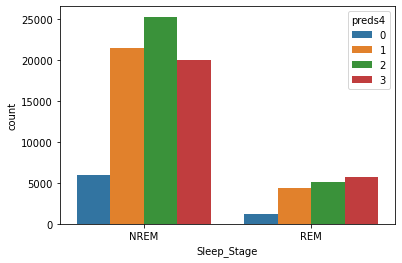

In [82]:
sns.countplot(data = ucs_25comp_labeled, x = 'Sleep_Stage', hue = 'preds4')

In [83]:
um_50comp = UMAP(n_neighbors = 50, min_dist = 0.9, n_components = 50)
ucs_50comp = um_50comp.fit_transform(df_norm_unlabeled)

ucs_50comp = pd.DataFrame(ucs_50comp)
ucs_50comp_labeled = ucs_50comp
ucs_50comp_labeled['Sleep_Stage'] = exclude

In [84]:
ucs_50comp_labeled['preds2'] = gmm2.fit_predict(ucs_50comp.drop('Sleep_Stage', axis = 1))
ucs_50comp_labeled['preds4'] = gmm4.fit_predict(ucs_50comp.drop(['Sleep_Stage', 'preds2'], axis = 1))

<AxesSubplot:xlabel='Sleep_Stage', ylabel='count'>

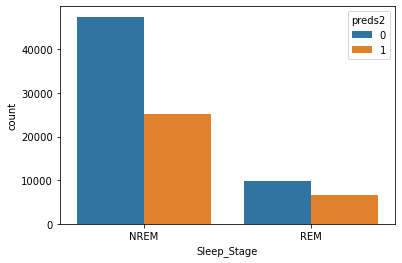

In [85]:
sns.countplot(data = ucs_50comp_labeled, x = 'Sleep_Stage', hue = 'preds2')

<AxesSubplot:xlabel='Sleep_Stage', ylabel='count'>

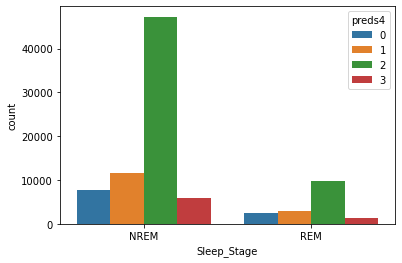

In [88]:
sns.countplot(data = ucs_50comp_labeled, x = 'Sleep_Stage', hue = 'preds4')

In [89]:
spec_clust2 = SpectralClustering(n_clusters = 2)
spec_clust4 = SpectralClustering(n_clusters = 4)

In [93]:
unpred = ucs_25comp.drop(['preds2', 'preds4'], axis = 1)
ucs_25_quarter = pd.concat([unpred[unpred['Sleep_Stage'] == 'NREM'].sample(frac = 0.25), unpred[unpred['Sleep_Stage'] == 'REM'].sample(frac = 0.25)])

In [96]:
ucs_25comp['spec_preds2'] = spec_clust2.fit_predict(ucs_25_quarter.drop('Sleep_Stage', axis = 1))

KeyboardInterrupt: 